## Introduction

We'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

The data is based on survey responded by the visitors of stackoverflow platform. It asks around 60 question related to experience, demogrphy, location, programming language etc.

## Downloading the dataset.

- We can use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL.

- But here we'll use the `opendatasets` helper library to download the files.
- To use `opendatets` we have to install it.

In [36]:
!pip install opendatasets --upgrade --q

In [37]:
import opendatasets as od

In [38]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.

In [39]:
import os

In [40]:
os.listdir('.')

['.config', 'stackoverflow-developer-survey-2020', 'sample_data']

In [41]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

It seems like the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [42]:
import pandas as pd

In [43]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [44]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

The dataset contains over 64,000 responses to 60 questions (although many questions are optional).Here, each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [45]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full question for each shortcodes in the column.. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series and make `Column` as the index and the  `QuestionText` as the value.

In [46]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText  
#index_col attribute assign a particular column in csv file as a inex in the dataframe.

`index_col` attribute assign a particular column in csv file as a index in the dataframe.

In [47]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [48]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We can now process & cleaning the data for the analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [49]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [50]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

`copy()` function copies the data into a new dataframe by refering from the original detaframe.

In [51]:
survey_df = survey_raw_df[selected_columns].copy()

In [52]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [53]:
survey_df.shape

(64461, 20)

In [54]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value.

In [55]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

We use `to_numeric()` function to convert the object type dataset into numeric type data. The attribute `error` has been set to `coerce` which essentially replaces the non-numeric value into Nan value.

Let's now view some basic statistics about numeric columns.

In [56]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


I seems like minimum age is 1 and maximum age is 279. This is a common problem in survey data as responses need not be accurate as there is no obligation to answer all question or rightly. 

We will simply delete the row containing age greater than 100 and less than 10 by using `drop()` function.

In [57]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

Here, `.index` means searching the condition passed by index. `inplace` attribute performs the operation in the dataframe passed in realtime.

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [58]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

It seems like the gender option in the survey allows to select multiple options. We'll remove values containing more than one option to simplify our analysis.

In [59]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [60]:
import numpy as np

In [61]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

I didnot know how to pass a condition for a string containing `;` as seperator. I refered to this [documentaion](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [62]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
12537,Germany,43.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,23.0,20.0,20.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, front-end;Developer, full-stack;Edu...",35.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Never,Very important
59233,Kenya,51.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,18.0,35.0,NaN,Bash/Shell/PowerShell;HTML/CSS;JavaScript,Bash/Shell/PowerShell;HTML/CSS;JavaScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",60.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
62764,Germany,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,7.0,30.0,18.0,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C++;Go;HTML/CSS;JavaScri...,Once a year,NaN,Employed full-time,"Developer, full-stack;Senior executive/VP",40.0,Very satisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4072,United States,14.0,Man,NaN,Web development or web design,Yes,10.0,4.0,NaN,HTML/CSS;Java;JavaScript;PHP;Python,HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Not at all important/not necessary
32992,Bulgaria,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,21.0,10.0,Bash/Shell/PowerShell;C++;Python,C++;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist;...,50.0,Slightly dissatisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Very important
44431,India,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
20284,United States,63.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,17.0,46.0,NaN,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,C;C++;Python,Once a year,Call a coworker or friend;Go for a walk or oth...,"Not employed, but looking for work",NaN,NaN,NaN,Flex time or a flexible schedule;Financial per...,NaN,Very important
15049,United Kingdom,27.0,Man,Some college/university study without earning ...,Web development or web design,Yes,16.0,11.0,4.0,C#;JavaScript;TypeScript,C#;TypeScript,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Designer;Developer, full-stack",37.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
28418,Iceland,20.0,"Non-binary, genderqueer, or gender non-conforming",Primary/elementary school,NaN,No,49.0,NaN,1.0,NaN,NaN,Every few months,NaN,Employed part-time,Scientist,2.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Fairly important
12848,United Kingdom,24.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,17.0,6.0,5.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;Developer, mobile;Produc...",45.0,Slightly satisfied,Flex time or a flexible 

## Exploratory Analysis and Visualization

Let's first plot some graph to figure out some trend in data.

We will import `matplotlib.pyplot` and `seaborn`.

In [63]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid') # Setting how the graph will look like.
matplotlib.rcParams['font.size'] = 14  #Fixing the size of text on graph.
matplotlib.rcParams['figure.figsize'] = (9, 5)  #Setting the size of the graph.
matplotlib.rcParams['figure.facecolor'] = '#00000000'  # Setting color of the graph

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [64]:
schema.Country  #Gives the full question attached with the column.

'Where do you live?'

In [65]:
survey_df.Country.nunique()

183

`nunique()` is a pandas function which gives total number of unique values.


Let's identify the countries with the highest number of respondents using the `value_counts()` function.

In [66]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We will use a bar chart to visualize this information.

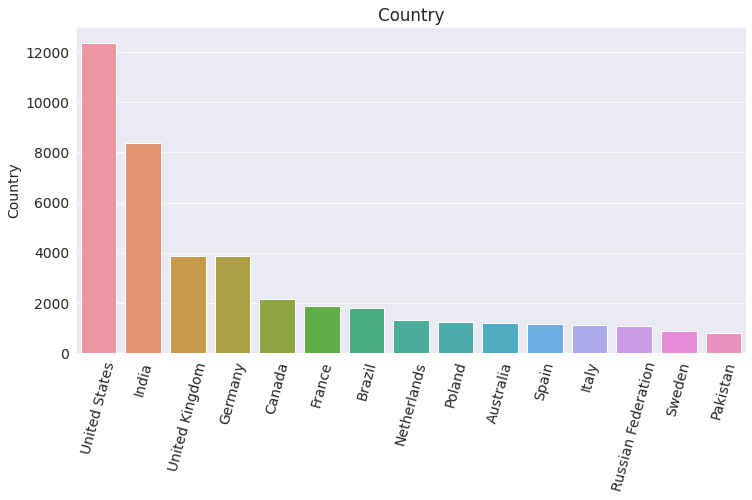

In [67]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)  #Rotates the country name ny 75 degree.
plt.title('Country')  ##Sets title to the graph.
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global population - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented. Such sample is called `sample bias`. What ever inference we make from such sample will not be true for entire population.


Now we find the percentage of responses from English-speaking vs. non-English speaking countries. 

As our dataset doesnot country language spoken in each country we will import a different dataset which contains language spoken in each country.

In [68]:
od.download('countries-languages-spoken')

16384it [00:00, 116106.87it/s]           

In [69]:
os.listdir('countries-languages-spoken')

['countries-languages.csv']

In [70]:
country_lang_raw=pd.read_csv('countries-languages-spoken/countries-languages.csv')
country_lang_raw.columns

Index(['Country', 'Languages Spoken'], dtype='object')

In [71]:
country_lang_raw

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


Here language spoken are clustered into a single string. We will word `English` identify each row in column `Languages Spoken` and then add a new column showing if the country is a `English` or `Non-English` speaking country.

In [72]:
country_lang_raw['English']=country_lang_raw['Languages Spoken'].str.contains("English")
#country_lang_raw

In [73]:
country_lang_raw.English.value_counts()

False    102
True      96
Name: English, dtype: int64

In [74]:
country_lang_raw['LangSpoken']= country_lang_raw['English'].map({True:'English', False:'NonEnglish'})

I have make a new column by referencing values from other column. For this I have used pandas function `map` documentation for which is [here]('https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html')

In [75]:
country_lang_raw

,Country,Languages Spoken,English,LangSpoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu...",False,NonEnglish
1,Albania,"Albanian (Tosk is the official dialect), Greek",False,NonEnglish
2,Algeria,"Arabic (official), French, Berber dialects",False,NonEnglish
3,Andorra,"Catalán (official), French, Castilian, Portuguese",False,NonEnglish
4,Angola,"Portuguese (official), Bantu and other African...",False,NonEnglish
...,...,...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...,True,English
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic",False,NonEnglish
195,Yemen,Arabic,False,NonEnglish
196,Zambia,"English (official); major vernaculars: Bemba, ...",True,English


In [76]:
country_lang_raw.LangSpoken.value_counts()

NonEnglish    102
English        96
Name: LangSpoken, dtype: int64

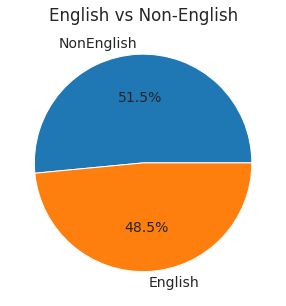

In [77]:
plt.title('English vs Non-English')
plt.pie(country_lang_raw.LangSpoken.value_counts()*100/country_lang_raw.LangSpoken.count(), labels=country_lang_raw.LangSpoken.value_counts().index
        , autopct='%1.1f%%');

It seems like 48% of the responds are from English speaking country.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

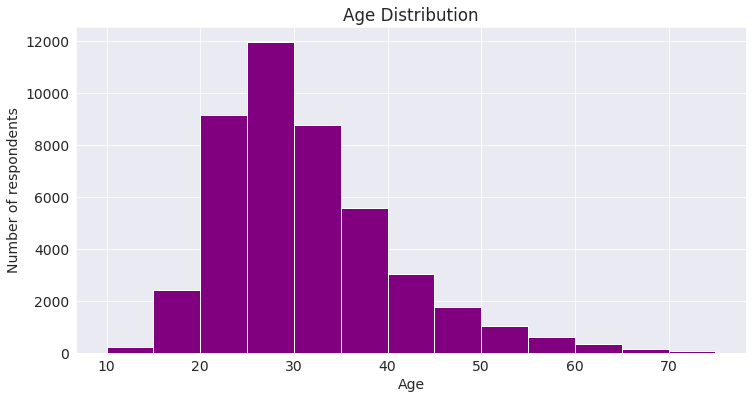

In [34]:
plt.figure(figsize=(12, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

We will now filter out responses by age (or age group) to analyze and compare the survey results for different age groups. 


In [78]:
bin = [0, 10,18, 30,45,60,100]
label=['Less than 10','Age 10-18', 'Age 18-30', 'Age 30-45', 'Age 45-60','more than60']
survey_df['AgeGroup']=pd.cut(survey_df.Age, bins=bin, right=False, labels=label)


We first make a new column which contains the age group for input in `Age` column

We use `cut()` function from pandas which divides a continous variable into desired bins with label attached to it. To see documentation [here]('https://www.geeksforgeeks.org/pandas-cut-method-in-python/')

In [79]:
survey_df[['Age','AgeGroup']]  #To display desired columns from dataframe.

,Age,AgeGroup
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,25.0,Age 18-30
4,31.0,Age 30-45
...,...,...
64456,NaN,NaN
64457,NaN,NaN
64458,NaN,NaN
64459,NaN,NaN


In [80]:
survey_df.AgeGroup.value_counts()

Age 18-30       22520
Age 30-45       17352
Age 45-60        3416
Age 10-18        1181
more than60       599
Less than 10        0
Name: AgeGroup, dtype: int64

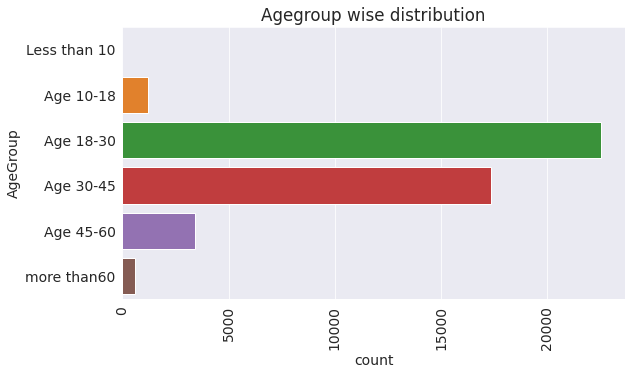

In [81]:
plt.xticks(rotation=90)
plt.title('Agegroup wise distribution')
sns.countplot(y=survey_df.AgeGroup);


Here we can see that maximum number of respondents are from age group `18-30` and `30-45` group. 

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [ ]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [ ]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

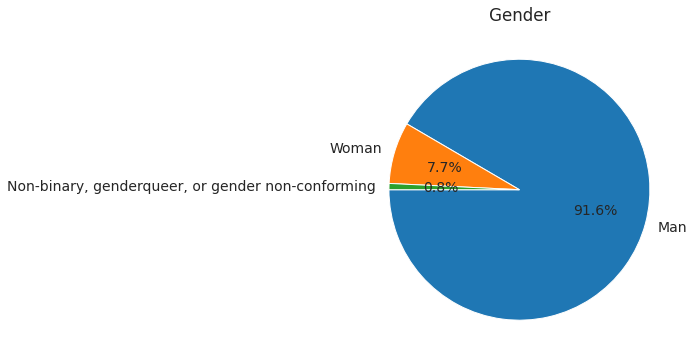

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gender')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the population.

### Education Level

Now let's compare the education levels of respondents to gain some insight. We'll use a horizontal bar plot here.

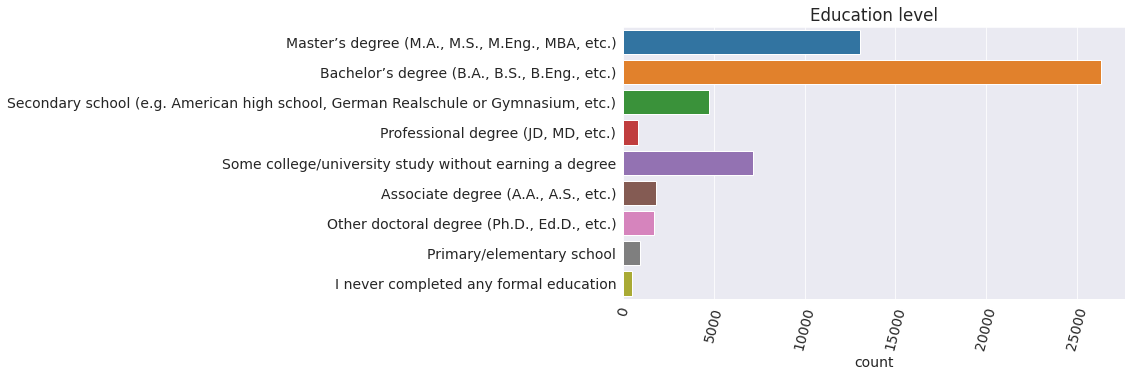

In [ ]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title('Education level')
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree.

Now lets compare level of education between male and female.
 

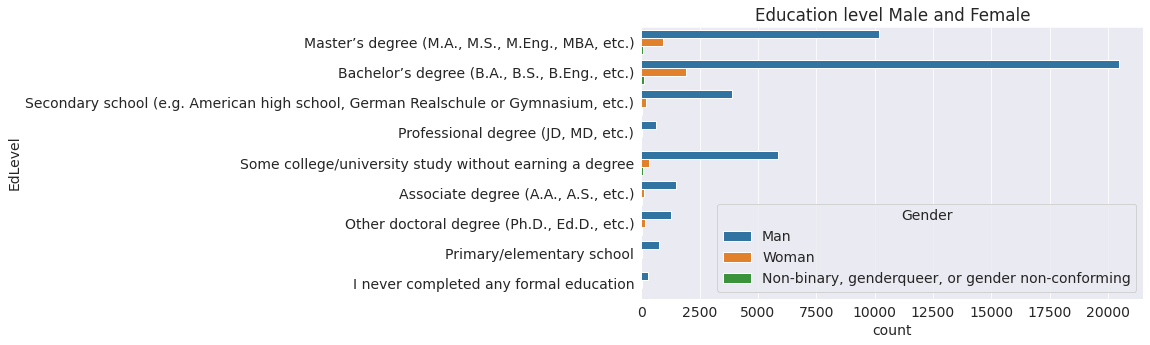

In [ ]:

plt.figure(figsize=(9,5))
plt.title('Education level Male and Female')

sns.countplot(y=survey_df.EdLevel, hue=survey_df.Gender);

It can be infered that very few women have responded to the survey as number of women in each category is disproportionaly low.

Now lets see education level in percentage.

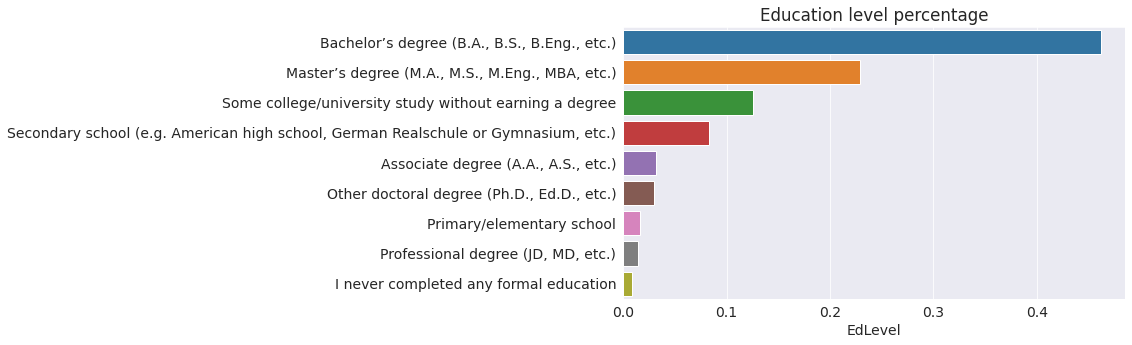

In [ ]:
edu_pct=(survey_df.EdLevel.value_counts()/survey_df.EdLevel.count())
edu_pct

plt.title('Education level percentage')
sns.barplot(y=edu_pct.index, x=edu_pct)

Nearly 50% of the respondents have completed education upto bachelor's level. 

Let's also plot undergraduate majors.

In [ ]:
schema.UndergradMajor

'What was your primary field of study?'

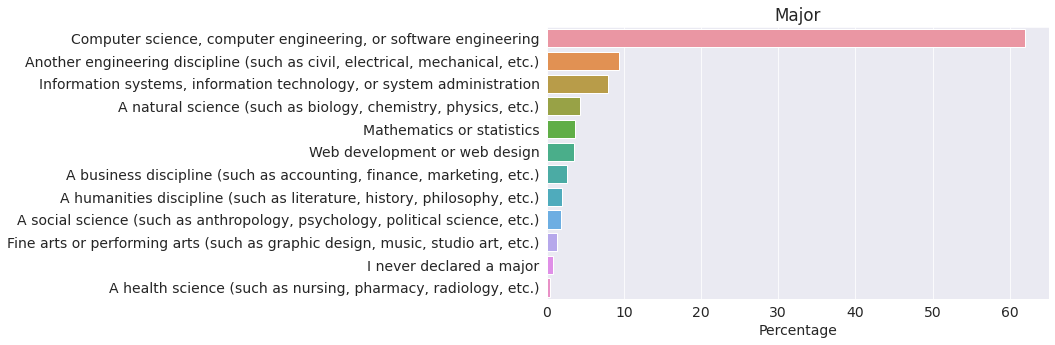

In [ ]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title('Major')
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging.

Moreover, we analyze respondents who hold some college degree vs. those who don't and their response on `how important is it to hold some degree?`


In [ ]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [ ]:
survey_df['Degrees']= survey_df['EdLevel'].map({'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Degree',
                                                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Degree',
                                                'Associate degree (A.A., A.S., etc.)':'Degree',
                                                'Other doctoral degree (Ph.D., Ed.D., etc.)':'Degree',
                                                'Professional degree (JD, MD, etc.)':'Degree',
                                                'Some college/university study without earning a degree':'NonDegree',
                                                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'NonDegree',
                                                'Primary/elementary school':'NonDegree',
                                                'I never completed any formal education':'NonDegree'})

In [ ]:
survey_df.Degrees.value_counts() 

Degree       43685
NonDegree    13296
Name: Degrees, dtype: int64

In [ ]:
survey_df.NEWEdImpt.unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

In [ ]:
survey_df.NEWEdImpt.value_counts()

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

In [ ]:
survey_df[['NEWEdImpt', 'Degrees']]

,NEWEdImpt,Degrees
0,Fairly important,Degree
1,Fairly important,Degree
2,NaN,NaN
3,Not at all important/not necessary,Degree
4,Very important,Degree
...,...,...
64456,Very important,Degree
64457,NaN,NaN
64458,NaN,NonDegree
64459,NaN,NaN


In [ ]:
Y=survey_df.NEWEdImpt.value_counts()*100/survey_df.NEWEdImpt.count()
Y


Fairly important                      26.174832
Very important                        24.500957
Somewhat important                    23.492473
Not at all important/not necessary    16.025534
Critically important                   9.806205
Name: NEWEdImpt, dtype: float64

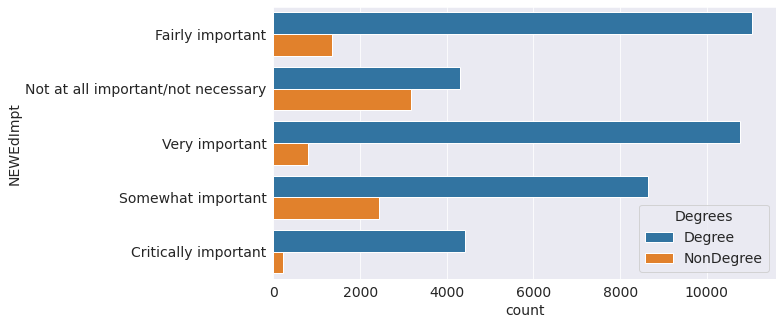

In [ ]:
sns.countplot(y=survey_df.NEWEdImpt, hue=survey_df.Degrees)

Those who hold some kind of degree also tend to think that having a degree is important to have degree to have a career in computer science. But there are significant number of respondents who also think that having a degree in computer science is not important.

### Employment

Let's examine the demography os type of employment.

In [ ]:
schema.Employment

'Which of the following best describes your current employment status?'

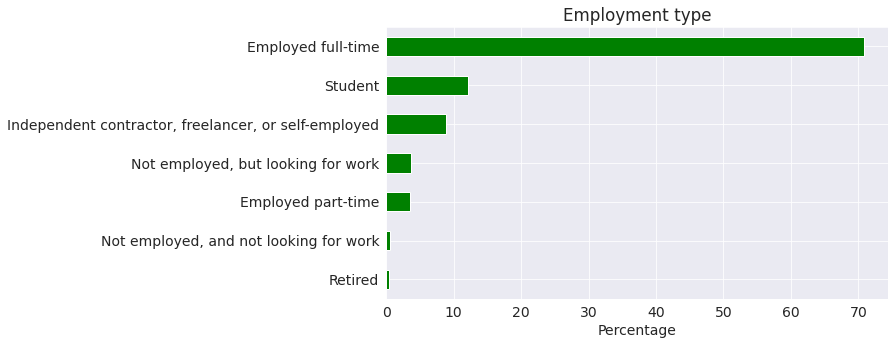

In [ ]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title('Employment type')
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers while 70% are employed full time.


In [ ]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                        4396
Developer, back-end                                                                                                                                                                                          3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                               2214
Developer, back-end;Developer, full-stack                                                                                                                                                                    1465
Developer, front-end                                                                                                                                            

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, each cell in the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [ ]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

Let's define a function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [ ]:
def split_multicolumn(col_series):     #Takes a column as a input.
    result_df = col_series.to_frame()  #Convert column into dataframe
    options = []   #New list to store name of each role separately.
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [ ]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals.to_frame()  # to convert series into dataframe.

,0
"Developer, back-end",26996
"Developer, full-stack",26915
"Developer, front-end",18128
"Developer, desktop or enterprise applications",11687
"Developer, mobile",9406
DevOps specialist,5915
Database administrator,5658
Designer,5262
System administrator,5185
"Developer, embedded applications or devices",4701


Now let's see what percentaage of respondent are related to data analyst.

In [ ]:
dev_type_sum=dev_type_df.sum().sort_values(ascending=False)
dev_type_sum


Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [ ]:
survey_df['Data']=survey_df.DevType.str.contains('Data' or 'Scientist')

In [ ]:
survey_df.Data.count()*100/dev_type_sum.sum()

31.485945323999974

We can say that about 31% of the respondent are from Data sceience field.

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 


In [ ]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [ ]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [ ]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,C,TypeScript,Bash/Shell/PowerShell,Kotlin,R,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can plot this information using a horizontal bar chart.

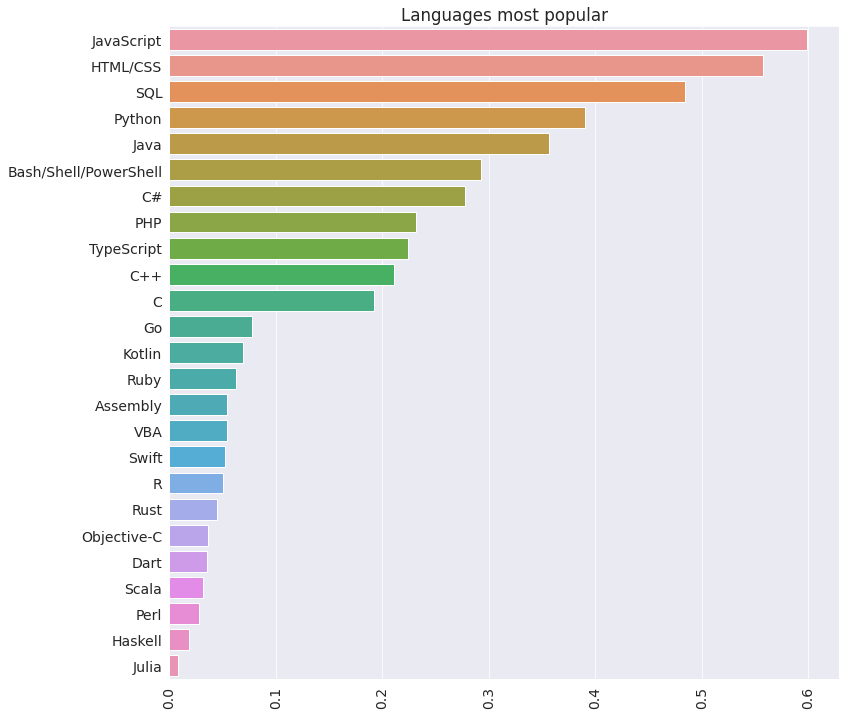

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Languages most popular')
plt.xticks(rotation=90)
sns.barplot(y=languages_worked_df.sum().sort_values(ascending=False).index, 
            x=languages_worked_df.mean().sort_values(ascending=False))


Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.


#### Q: Which languages are the most people interested to learn over the next year?


In [ ]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

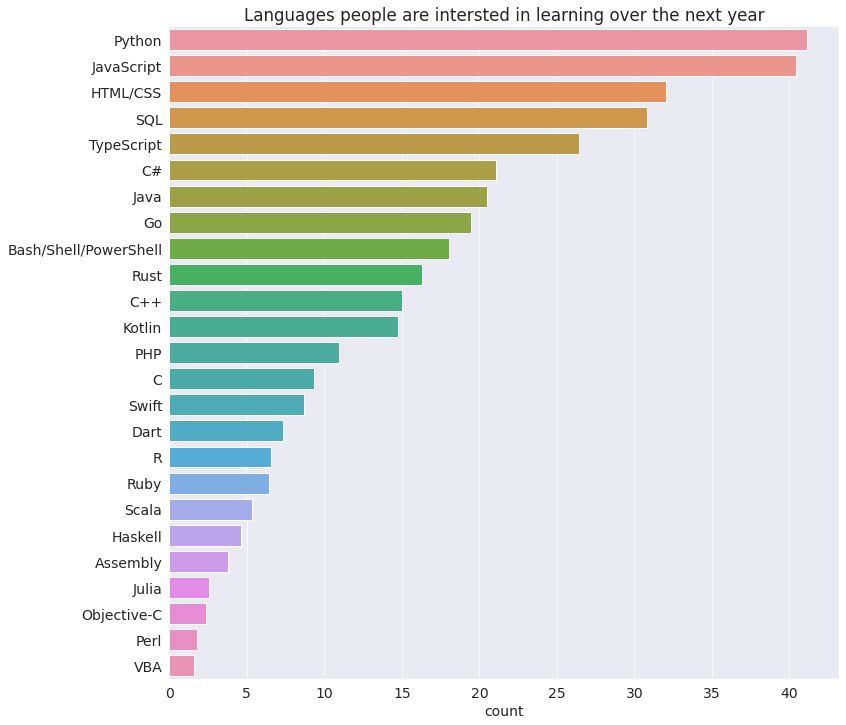

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

It's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!


#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

We follow the following steps to get answer.
- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [ ]:
languages_loved_df = languages_worked_df & languages_interested_df

In [ ]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

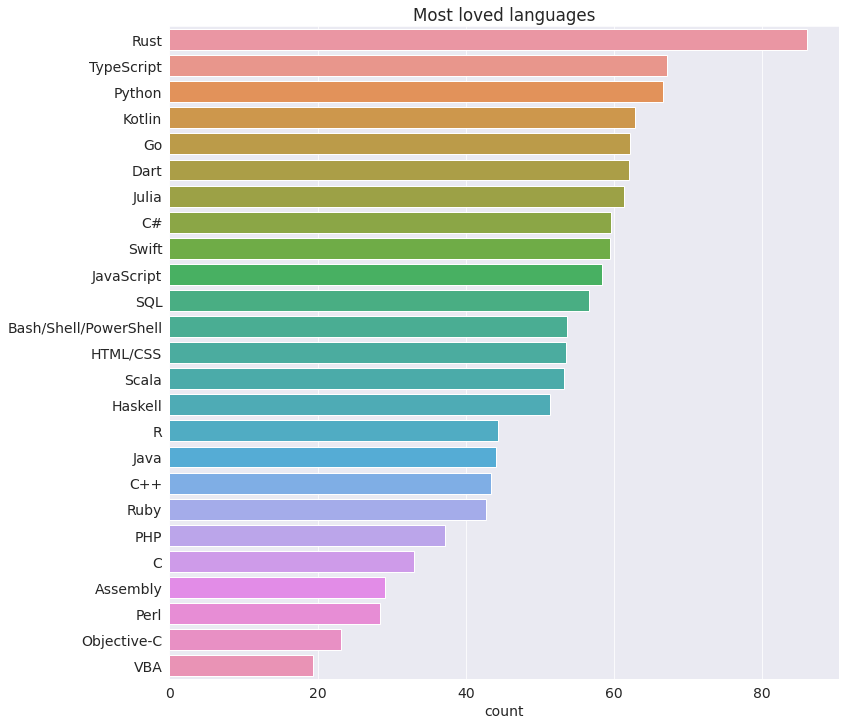

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been StackOverflow's most-loved language. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.


#### Q: In which countries do developers work the highest number of hours per week?

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents so that inference is more consistent

In [ ]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [ ]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [ ]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.


#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [ ]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

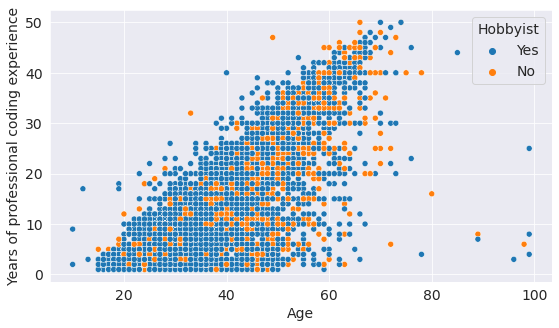

In [ ]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

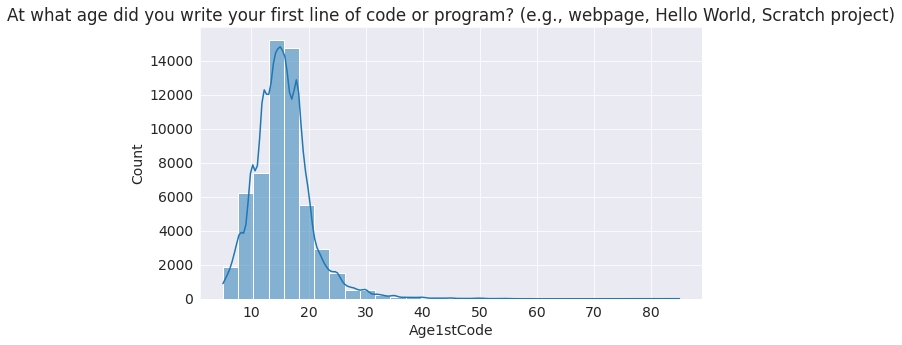

In [ ]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code. 


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ashish6552/python-eda-stackoverflow-survey-ashish


'https://jovian.ai/ashish6552/python-eda-stackoverflow-survey-ashish'

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## References and Future Work



- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

As a next step, you can try out a project on another dataset of your choice: https://jovian.ml/aakashns/zerotopandas-course-project-starter .

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ashish6552/python-eda-stackoverflow-survey-ashish


'https://jovian.ai/ashish6552/python-eda-stackoverflow-survey-ashish'